# Train Data using XGBoost Model

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from src.models.train_model import *
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Test with Ordinal Encoding Data

### Load data

In [4]:
file_path = '../data/processed/1_1_processed_ordinal_encoding.csv'
print(f'Loading file from {file_path}')

df = pd.read_csv(file_path)
x = df.drop(['Value', 'Wage'], axis=1)
y = df['Value']

Loading file from ../data/processed/1_1_processed_ordinal_encoding.csv


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train Regressor with XGBoost backend

In [6]:
params = None
try:
    with open('best_params_xgbost.json') as fp:
        params = json.load(fp)
        pp.pprint(params)
except:
    params = {}

model = Regressor(**params)

Using XGBoost as backend


In [7]:
print('Tuning HyperParameters')
model.tune_hyper_parameters(x_train, y_train)

Tuning HyperParameters
100%|██████████| 100/100 [18:45<00:00, 11.26s/it, best loss: 666620862568.6324]
Using XGBoost as backend


In [8]:
print(f'Training model')
model.train(x_train, y_train)

Training model


In [9]:
print('Predicting test samples')
predictions: pd.DataFrame = model.predict(x_test)

Predicting test samples


In [10]:
print('Prediction Finished. RMSE:')
print(mean_squared_error(y_test, predictions, squared=False))

Prediction Finished. RMSE:
966485.113741025


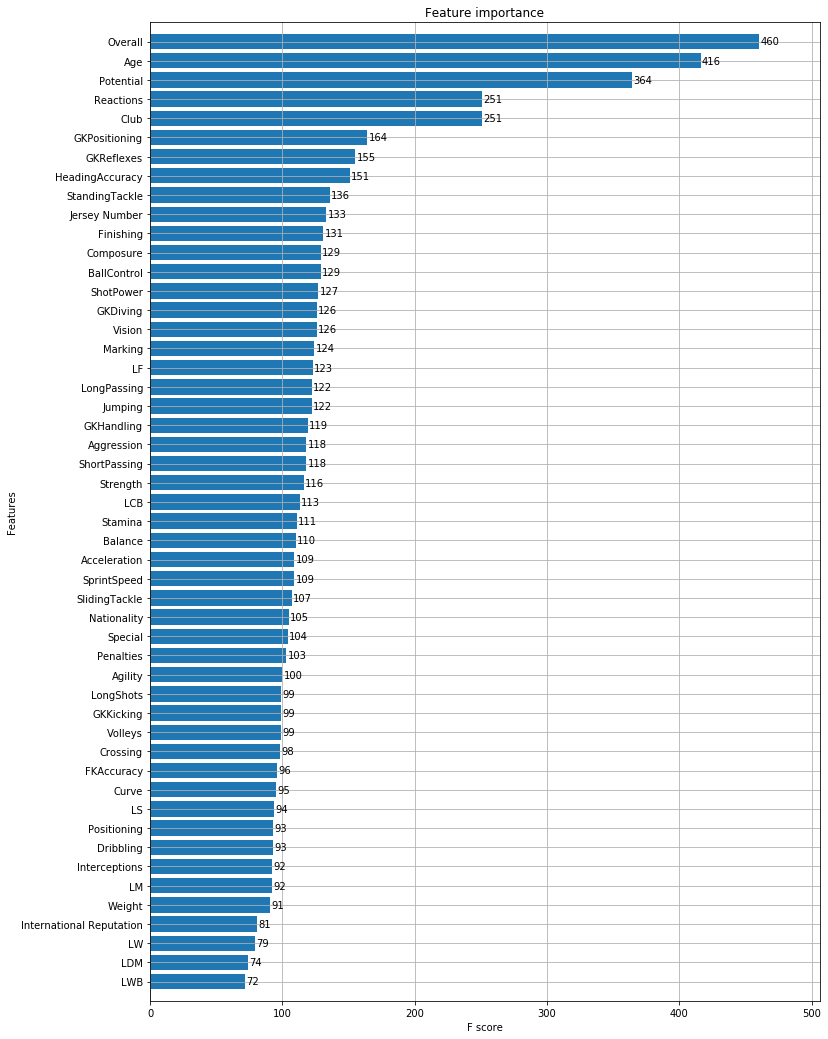

In [11]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model._model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Test with OneHotEncoding Data

### Load Data

In [22]:
file_path = '../data/processed/1_1_processed_onehot_encoding.csv'
print(f'Loading file from {file_path}')

df = pd.read_csv(file_path)
x = df.drop(['Value', 'Wage'], axis=1)
y = df['Value']

Loading file from ../data/processed/1_1_processed_onehot_encoding.csv


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train Regressor with XGBoost backend

In [24]:
params = None
try:
    with open('best_params_xgbost.json') as fp:
        params = json.load(fp)
        pp.pprint(params)
except:
    params = {}

model = Regressor(**params)

Using XGBoost as backend


In [26]:
print('Tuning HyperParameters')
model.tune_hyper_parameters(x_train, y_train)

Tuning HyperParameters
100%|██████████| 100/100 [57:30<00:00, 34.50s/it, best loss: 1686158236464.5815]  
Using XGBoost as backend


In [27]:
print(f'Training model')
model.train(x_train, y_train)

Training model


In [28]:
print('Predicting test samples')
predictions: pd.DataFrame = model.predict(x_test)

Predicting test samples


In [29]:
print('Prediction Finished. RMSE:')
print(mean_squared_error(y_test, predictions, squared=False))

Prediction Finished. RMSE:
1102794.5557360956


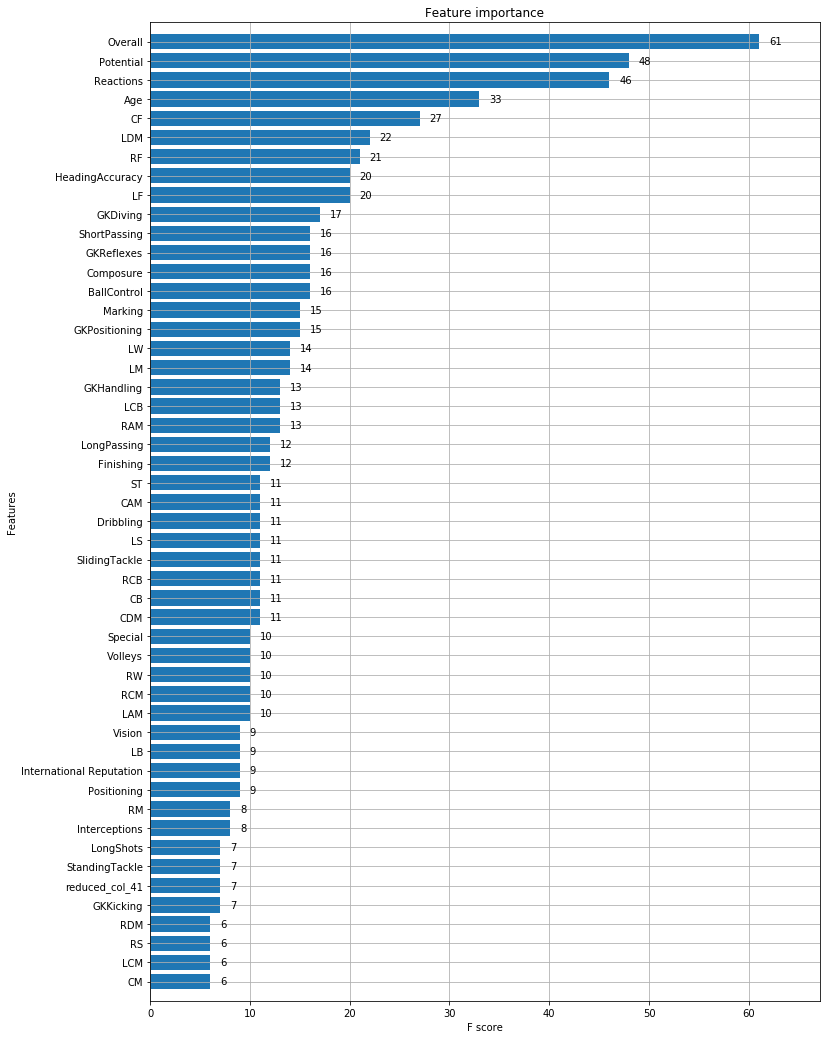

In [30]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model._model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Conclusion on XGBoost model

Both feature engineering process presented simmilar error metrics. The dataset using **ordinal** encoding performed slightly better. Considering that the computational time spent to train on this dataset is lower than the other, the feature engineering using ordinal encoding to handle categorical data will be choosed when using XGBoost model.